<font size="+5">#08. Hyperparameter Tuning with Cross Validation</font>

- Book + Private Lessons [Here ↗](https://sotastica.com/reservar)
- Subscribe to my [Blog ↗](https://blog.pythonassembly.com/)
- Let's keep in touch on [LinkedIn ↗](www.linkedin.com/in/jsulopz) 😄

# Load the Data

> - The goal of this dataset is
> - To predict if **bank's customers** (rows) `default` next month
> - Based on their **socio-demographical characteristics** (columns)

In [9]:
import pandas as pd
pd.set_option("display.max_columns", None)

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls'
df = pd.read_excel(io=url, header=1, index_col=0)
df.sample(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
9556,240000,1,4,2,29,0,0,0,0,0,0,219419,151914,159320,148705,134563,195628,7000,10082,8095,7015,67006,7026,0
538,120000,1,2,1,44,0,0,0,0,0,0,92007,87939,82094,59105,53442,46775,5417,2847,2066,1919,2200,0,0
21532,50000,2,2,2,23,0,0,0,0,0,0,50614,48702,47770,37239,20526,19771,2500,1700,2151,687,2000,669,0
8353,300000,2,2,1,31,-1,-1,-1,-1,-1,-1,3863,4242,5090,309,2700,7593,5021,5134,322,5013,7611,8059,0
23821,170000,2,2,2,51,0,-1,-1,-1,-1,-1,1606,1420,1420,1420,1420,3464,1420,1420,1420,1420,3464,1420,0
28379,260000,2,5,2,39,0,0,0,0,0,0,174591,175093,176088,155624,141976,141305,10000,10000,7619,7000,8000,7000,0
5330,170000,1,2,2,41,-2,-2,-2,-2,-1,-1,6175,7404,7829,2218,3972,3643,7417,7862,2218,4866,3643,2732,0
29647,70000,1,2,1,29,0,0,0,0,0,0,78244,19275,11231,10694,27908,11192,2009,1404,3016,20001,2000,5002,0
23458,80000,2,3,1,41,-1,-1,-1,-1,-1,-1,3526,10129,6100,6420,606,7228,10129,6100,6434,606,7228,14387,0


# `DecisionTreeClassifier()` with Default Hyperparameters

In [2]:
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X = df.drop(columns='default payment next month')

In [5]:
y = df['default payment next month']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
model = DecisionTreeClassifier()

In [8]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

## Accuracy

> In `train` data

In [26]:
model.score(X_train, y_train)

0.9995024875621891

> In `test` data

In [27]:
model.score(X_test, y_test)

0.7241414141414141

## Model Visualization

> - `plot_tree()`

In [28]:
from sklearn.tree import plot_tree

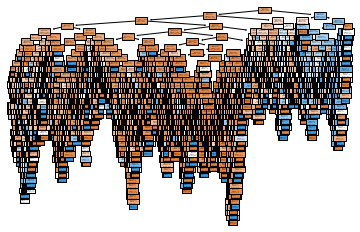

In [29]:
plot_tree(decision_tree=model, feature_names=X.columns, filled=True);

# `DecisionTreeClassifier()` with Custom Hyperparameters

In [18]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/7VeUPuFGJHk" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

> - The `model` has this hyperparameters ↓

In [19]:
model = DecisionTreeClassifier()

In [20]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

## 1st Configuration

In [30]:
model = DecisionTreeClassifier(max_depth=4)

In [31]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

## Accuracy

> In `train` data

In [32]:
model.score(X_train, y_train)

0.8232338308457712

> In `test` data

In [33]:
model.score(X_test, y_test)

0.8205050505050505

## Model Visualization

> - `plot_tree()`

In [34]:
from sklearn.tree import plot_tree

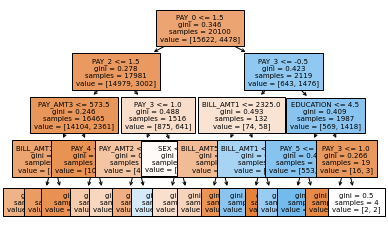

In [37]:
plot_tree(decision_tree=model, feature_names=X.columns, filled=True, fontsize=7);

## 2nd Configuration

In [38]:
model = DecisionTreeClassifier(criterion='entropy')

In [39]:
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

## Accuracy

> In `train` data

In [40]:
model.score(X_train, y_train)

0.9995024875621891

> In `test` data

In [41]:
model.score(X_test, y_test)

0.7316161616161616

## Model Visualization

> - `plot_tree()`

In [28]:
from sklearn.tree import plot_tree

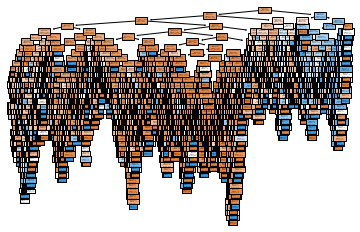

In [29]:
plot_tree(decision_tree=model, feature_names=X.columns, filled=True);

## 3rd Configuration

In [42]:
model = DecisionTreeClassifier(min_samples_leaf=50)

In [43]:
model.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=50)

## Accuracy

> In `train` data

In [44]:
model.score(X_train, y_train)

0.827363184079602

> In `test` data

In [45]:
model.score(X_test, y_test)

0.8145454545454546

## Model Visualization

> - `plot_tree()`

In [46]:
from sklearn.tree import plot_tree

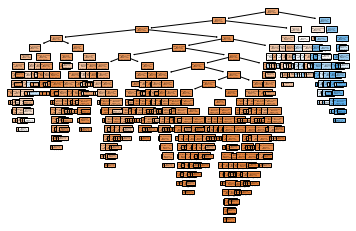

In [47]:
plot_tree(decision_tree=model, feature_names=X.columns, filled=True);

## 4th Configuration

In [48]:
model = DecisionTreeClassifier(min_samples_leaf=100)

In [49]:
model.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=100)

## Accuracy

> In `train` data

In [50]:
model.score(X_train, y_train)

0.8244278606965174

> In `test` data

In [51]:
model.score(X_test, y_test)

0.8161616161616162

## Model Visualization

> - `plot_tree()`

In [52]:
from sklearn.tree import plot_tree

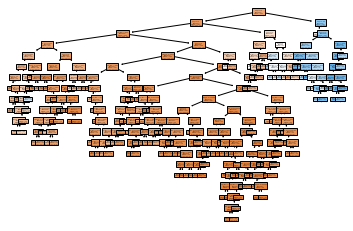

In [53]:
plot_tree(decision_tree=model, feature_names=X.columns, filled=True);

## 5th Configuration

In [1]:
model = DecisionTreeClassifier(min_samples_leaf=200)

NameError: name 'DecisionTreeClassifier' is not defined

In [55]:
model.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=200)

## Accuracy

> In `train` data

In [56]:
model.score(X_train, y_train)

0.8211940298507463

> In `test` data

In [57]:
model.score(X_test, y_test)

0.8186868686868687

## Model Visualization

> - `plot_tree()`

In [58]:
from sklearn.tree import plot_tree

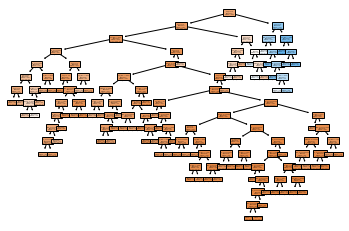

In [59]:
plot_tree(decision_tree=model, feature_names=X.columns, filled=True);

# `GridSearchCV()` to find Best Hyperparameters

> - How many scores for each fold?

<img src="src/grid_search_cross_validation.png" style="margin-top: 100px"/>

In [11]:
from sklearn.model_selection import GridSearchCV

In [37]:
cv = GridSearchCV()

TypeError: __init__() missing 2 required positional arguments: 'estimator' and 'param_grid'

In [38]:
dt = DecisionTreeClassifier()

In [39]:
cv_dt = GridSearchCV(estimator=dt, param_grid={'min_samples_leaf': [50, 100, 200],
                                            'criterion': ['gini', 'entropy'],
                                           'max_depth': [5,8,11, 15]}, verbose=2)

In [24]:
cv_dt.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=50; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=50; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=50; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=50; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=50; total time=   0.0s
[CV] END ..criterion=gini, max_depth=5, min_samples_leaf=100; total time=   0.0s
[CV] END ..criterion=gini, max_depth=5, min_samples_leaf=100; total time=   0.0s
[CV] END ..criterion=gini, max_depth=5, min_samples_leaf=100; total time=   0.0s
[CV] END ..criterion=gini, max_depth=5, min_samples_leaf=100; total time=   0.0s
[CV] END ..criterion=gini, max_depth=5, min_samples_leaf=100; total time=   0.0s
[CV] END ..criterion=gini, max_depth=5, min_samples_leaf=200; total time=   0.0s
[CV] END ..criterion=gini, max_depth=5, min_sam

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 8, 11, 15],
                         'min_samples_leaf': [50, 100, 200]},
             verbose=2)

In [25]:
cv_dt.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 100}

# Other Models

## Support Vector Machines `SVC()`

In [18]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/efR1C6CvhmE" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [19]:
from sklearn.svm import SVC

In [26]:
sv = SVC()

In [40]:
cv_sv = GridSearchCV(estimator=sv, param_grid={}, verbose=2)

In [ ]:
cv_sv.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


## `KNeighborsClassifier()`

In [70]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/HVXime0nQeI" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

# Best Model with Best Hyperparameters